In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import cv2

img=cv2.imread("D:\\Rangers\\kavin\\k2.jpeg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)



face_cascade=cv2.CascadeClassifier("C:\\Users\\91984\\Desktop\\cv\\haarcascades\\haarcascade_frontalface_alt.xml")
eye_cascade=cv2.CascadeClassifier("C:\\Users\\91984\\Desktop\\cv\\haarcascades\\haarcascade_eye.xml")

face=face_cascade.detectMultiScale(gray,1.1,4)
face


array([[213, 600, 438, 438]], dtype=int32)

In [3]:
(x,y,w,h)=face[0]
x,y,w,h

(213, 600, 438, 438)

In [4]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
for (x,y,w,h) in face:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eye=eye_cascade.detectMultiScale(roi_gray)

    for (ex,ey,ew,eh) in eye:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
cv2.imshow("img",roi_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

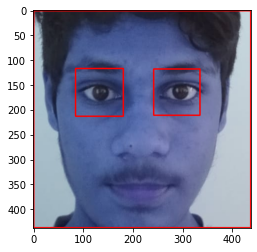

In [5]:
plt.imshow(roi_color)

In [6]:
def cropped(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face=face_cascade.detectMultiScale(gray,1.1,9)
    for (x,y,w,h) in face:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eye=eye_cascade.detectMultiScale(roi_gray)
        return roi_color
        

In [22]:
cropped_image=cropped("D:\\Rangers\\prabakaran\\p1.jpg")
plt.imshow(cropped_image)

error: OpenCV(3.4.13) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-qioszjlt\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [7]:
path_to_data="D:\\Rangers"
path_to_cr_data="D:\\Rangers\\cropped"


In [8]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['D:\\Rangers\\cropped',
 'D:\\Rangers\\kavin',
 'D:\\Rangers\\mandela',
 'D:\\Rangers\\unknown']

In [9]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [8]:
cropped_img_dirs=[]
count=0
rangers_file_names_dict={}
for img_dir in img_dirs:
    l1=[]
    rangers_name=img_dir.split("\\")[-1]
    print(rangers_name)
    for entry in os.scandir(img_dir):
        roi_color=cropped(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+"\\"+rangers_name
            print(cropped_folder)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                print(" Generating : ",cropped_folder)
                cropped_img_dirs.append(cropped_folder)
            cropped_file_name=rangers_name+str(count)+".png"
            cropped_file_path=cropped_folder+"\\"+cropped_file_name
            l1.append(cropped_file_path)
            
            cv2.imwrite(cropped_file_path,roi_color)
            count+=1
            
            
    rangers_file_names_dict[rangers_name]=l1
            
print(rangers_file_names_dict)

kavin
D:\Rangers\cropped\kavin
 Generating :  D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
D:\Rangers\cropped\kavin
mandela
D:\Rangers\cropped\mandela
 Generating :  D:\Rangers\cropped\mandela
D:\Rangers\cropped\mandela
D:\Rangers\cropped\mandela
D:\Rangers\cropped\mandela
D:\Rangers\cropped\mandela
D:\Rangers\cropped\mandela
D:\Rangers\cropped\mandela
D:\Rangers\cropped\mandela
D:\Rangers\cropped\mandela
D:\Rangers\

In [17]:
!pip install PyWavelets

In [9]:
#wavelet transform
import pywt
import cv2
import numpy as np


def w2d(img,mode='haar',level=1):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_BGR2GRAY)
    imArray=np.float32(imArray)
    imArray/=255
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0] *=0
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H


    

In [10]:
class_dict={}
count=0
for name in rangers_file_names_dict.items():
    class_dict[name[0]]=count
    count+=1
class_dict

{'kavin': 0, 'mandela': 1, 'unknown': 2}

In [11]:
x=[]
y=[]



for rangers_name,training_files in rangers_file_names_dict.items():
    for img in training_files:
        img=cv2.imread(img)
        if img is None:
            continue
        scaling=cv2.resize(img,(32,32))
        img_wavelet=w2d(img,'db1',5)
        scaled_img_wavelet=cv2.resize(img_wavelet,(32,32))
        combined=np.vstack((scaling.reshape(32*32*3,1),scaled_img_wavelet.reshape(32*32,1)))
        x.append(combined)
        y.append(class_dict[rangers_name])

len(x)
        
        

82

In [12]:
len(x[0])

4096

In [13]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape


(82, 4096)

In [32]:
!pip install scikit-learn

In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

1.0

In [16]:
len(x_test)

21

In [17]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [18]:
from sklearn  import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [19]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [20]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.983333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.883333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,1.000000,{'logisticregression__C': 1}


In [40]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [21]:
best_clf=best_estimators['svm']

In [22]:
best_estimators['logistic_regression'].score(x_test,y_test)

1.0

In [25]:
best_estimators['svm'].score(x_test,y_test)

1.0

In [ ]:
best_estimators['random_forest'].score(x_test,y_test)

Text(69.0, 0.5, 'Truth')

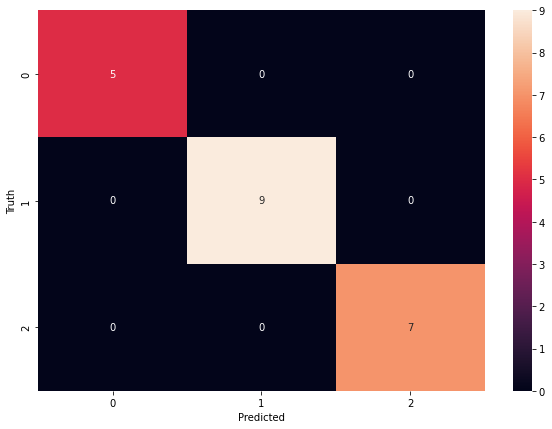

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(x_test))
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [1]:
x=[]
img=cropped("D:\\k6.jpeg")

cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()


scaling=cv2.resize(img,(32,32))
img_wavelet=w2d(img,'db1',5)
scaled_img_wavelet=cv2.resize(img_wavelet,(32,32))
combined=np.vstack((scaling.reshape(32*32*3,1),scaled_img_wavelet.reshape(32*32,1)))
x.append(combined)
x = np.array(x).reshape(len(x),4096).astype(float)
print(len(x[0]))


ans=best_clf.predict(x)[0]

for i in class_dict:
    if(class_dict[i]==ans):
        print(i)

NameError: name 'cropped' is not defined

In [49]:
!pip install joblib
import joblib

joblib.dump(best_clf,'D:\\Rangers\\saved_model.pkl')

['D:\\Rangers\\saved_model.pkl']

In [16]:
import json
with open("D:\\Rangers\\class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [ ]:
def get_b64_virat():
    with open("D://Rangers//virat.txt") as f:
        return f.read()

def classify_image(img_base64_data,file_path=None):
    pass

if __name__="__main__":
    

In [ ]:
app=Flask(__name__)
@app.route('/classify_image',methods=['GET','POST'])
def classify_image():
    return "hi"

if __name__=="__main__":
    app.run(port=5000)

In [17]:
from flask import request,jsonify,Flask

In [18]:
!pip install base64

ERROR: Could not find a version that satisfies the requirement base64 (from versions: none)
ERROR: No matching distribution found for base64


In [29]:
import joblib
import json
import numpy as np
import base64
import cv2


__class_name_to_number = {}
__class_number_to_name = {}

__model = None

def classify_image(image_base64_data, file_path=None):

    imgs = get_cropped_image_if_2_eyes(file_path, image_base64_data)

    result = []
    for img in imgs:
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))

        len_image_array = 32*32*3 + 32*32

        final = combined_img.reshape(1,len_image_array).astype(float)
        '''result.append({
            'class': class_number_to_name(__model.predict(final)[0]),
            'class_probability': np.around(__model.predict_proba(final)*100,2).tolist()[0],
            'class_dictionary': __class_name_to_number
        })'''
        result.append(__model.predict(final)[0])
        print(result)

    return result

def class_number_to_name(class_num):
    return __class_number_to_name[class_num]

def load_saved_artifacts():
    print("loading saved artifacts...start")
    global __class_name_to_number
    global __class_number_to_name

    with open("D:\\Rangers\\sever\\artifacts\\class_dictionary.json", "r") as f:
        __class_name_to_number = json.load(f)
        __class_number_to_name = {v:k for k,v in __class_name_to_number.items()}

    global __model
    if __model is None:
        with open('D:\\Rangers\\sever\\artifacts\\saved_model.pkl', 'rb') as f:
            __model = joblib.load(f)
    print("loading saved artifacts...done")


def get_cv2_image_from_base64_string(b64str):
    '''
    credit: https://stackoverflow.com/questions/33754935/read-a-base-64-encoded-image-from-memory-using-opencv-python-library
    :param uri:
    :return:
    '''
    
    encoded_data = b64str
    
    nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

def get_cropped_image_if_2_eyes(image_path, image_base64_data):
    
    face_cascade=cv2.CascadeClassifier("C:\\Users\\91984\\Desktop\\cv\\haarcascades\\haarcascade_frontalface_alt.xml")
    eye_cascade=cv2.CascadeClassifier("C:\\Users\\91984\\Desktop\\cv\\haarcascades\\haarcascade_eye.xml")


    if image_path:
        img = cv2.imread(image_path)
    else:
        img = get_cv2_image_from_base64_string(image_base64_data)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    cropped_faces = []
    for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 0:
                cropped_faces.append(roi_color)
    return cropped_faces

def get_b64_virat():
    with open("D://Rangers//mandela//mandela.txt") as f:
        return f.read()

if __name__ == '__main__':
    load_saved_artifacts()

    print(classify_image(get_b64_virat(), None))

loading saved artifacts...start
loading saved artifacts...done
[]
